

___

<a href='https://fingertips.co.in/'><img src='ft_logo_new.png'/></a>
___
<center><em>Content Copyright by Fingertips Data Intelligence Solutions</em></center>

# File Handling, Serialization & Deserialization

## Agenda!
1. Basics
2. Writing to a file (non-existing & already existing)
3. Reading a file
4. Context manager (with)
5. seek & tell functions
6. Some issues working with text mode
7. Working with binary mode
8. Working with other complex data types
9. Serialization
10. Working with JSON 
11. Deserialization
12. Serialization & Deserialization of custom objects
13. Pickling
14. Difference between JSON & Pickle

### 1. Basics
There are 2 types of data used for Input/Output operations which are text & binary data-types. 

And to deal with these 2 types of data, we have 2 types of files text files & binary files.
1. Text files - all program files
2. Binary files - images, audios, videos files

Input/Output operations are done in 3 steps:
1. Opening a file
2. Read or write into that file
3. finally, close the file (but why? memory consumption & security reasons.)

### 2. Writing to a file
- case-1--> when file is not present
- case-2--> when file is already present

#### case 1 - when file is not present

In [155]:
#open the file
f = open('test1.txt','w')

how open() works?

In [156]:
#write in file
f.write('Welcome coders!')

15

In [157]:
#close the file
f.close()

In [158]:
f.write('hello')
# we can't write in a file, in closed mode, first we haev to open it.

ValueError: I/O operation on closed file.

In [159]:
# write multiple lines in non-existing file
f = open('test2.txt','w')
f.write('Hello all to this tutorial on file handling!')
f.write('\nWe will learn this in very detail')
f.close()

#### case 2 - when file is already present

In [160]:
f = open('test1.txt','w')
f.write('Hello & welcome you all in this video.')
# now instead of 'Welcome coders!' we have this string.
f.close()

In [161]:
# What's the issue with w mode

f = open('test1.txt','a')
f.write('\nWe will learn all about file handling in this session.')
f.close()

In [162]:
# writing multiple lines using a single list
L = ['Welcome\n','to\n','this\n','tutorial\n', 'on\n', 'file handling.']

f = open('test1.txt','w')
f.writelines(L)
f.close()

### 3. Reading a file

In [163]:
#open a file
f = open('test1.txt','r')

In [164]:
#read a file
s = f.read()
#print 
print(s)

Welcome
to
this
tutorial
on
file handling.


In [165]:
#close a file
f.close()

In [166]:
# read only n-characters
f = open('test1.txt','r')
s = f.read(9)
print(s)
f.close()

Welcome
t


In [167]:
# readline() -> to read line by line
f = open('test1.txt','r')
print(f.readline())
print(f.readline())
f.close()

Welcome

to



In [168]:
# readline() -> to read line by line
f = open('test1.txt','r')
print(f.readline(),end='')
print(f.readline(),end='')
print(f.readline(),end='')
f.close()

Welcome
to
this


In [169]:
# now we don't know how many lines are there. So, we read file till we reach till the end.

f = open('test1.txt','r')

while True:
  lines = f.readline()

  if lines == '':
    break
  else:
    print(lines,end='')

f.close()
#this is how we reach till the end.

Welcome
to
this
tutorial
on
file handling.

### 4. Context Manager (With)
1. We should always close a file after using it, as it will free up the resources.
2. Anyhow, garbage collector will close it, if we don't do.
3. We can close a file without using close(). 'with' closes the file as soon as the usage is over.

In [170]:
#open->write->close
with open('test1.txt','w') as f:
  f.write('File handling!')

In [171]:
f.write('let us write again...')

ValueError: I/O operation on closed file.

In [172]:
# open->read->close
with open('test2.txt','r') as f:
  print(f.readline())

Hello all to this tutorial on file handling!



In [173]:
# open-> read 6 characters each time-> close
with open('test2.txt','r') as f:
  print(f.read(6))
  print(f.read(6))
  print(f.read(6))
  print(f.read(6))

Hello 
all to
 this 
tutori


In [174]:
# we can use this strategy to load a big files in our memory

#create a big list
l1 = ['hey coders! ' for i in range(100)]

In [175]:
#open->write->close
with open('large_file.txt','w') as f:
  f.writelines(l1)

In [176]:
#open->read->close

with open('large_file.txt', 'r') as f:
    print(f.read())

hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey coders! hey 

In [177]:
ers! he
s! hey 
 hey co

SyntaxError: invalid syntax (2759652575.py, line 1)

In [178]:
#open->read file till the end -> close
with open('large_file.txt','r') as f:

  part = 2

  while len(f.read(part)) > 0:
    print(f.read(part))
    f.read(part)

y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs
y 
rs


In [179]:
#open->read file till the end -> close
with open('large_file.txt','r') as f:

  part = 2

  while len(f.read(part)) > 0:
    print(f.read(part), end='@')
    f.read(part)

y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@y @rs@

### 5. seek & tell functions
The seek() function is used to set the position of the file cursor, whereas the tell() function returns the position where the cursor is set to begin reading.

In [180]:
#open->read->close
with open('test1.txt', 'r') as f:
    print(f.read())
    
#by-default the cursor starts from lacation-0

File handling!


In [181]:
#open->read->close
#seek-> when we want to set the cursor at some specific location.
#tell-> when we want the position where the cursor at present.

with open('test1.txt','r') as f:
  f.seek(5)
  print(f.read(4))
  print(f.tell())

hand
9


In [182]:
#open->read->close
#seek-> when we want to set the cursor at some specific location.
#tell-> when we want the position where the cursor at present.

with open('test1.txt','r') as f:
  f.seek(3)
  print(f.read(6))
  print(f.tell())

  print(f.read(3))
  print(f.tell())

e hand
9
lin
12


In [183]:
#open->write->close
# using seek function while writing into a file

with open('test1.txt','w') as f:
  f.write('Welcome all!')
  f.seek(2)
  f.write('@#$')

#used to replace the text at some location of file

### 6. Some issues working with text mode
There are some issues working with text files:

1. We can't work with binary files like audios/images etc.
2. We can't work properly with other data types apart from 'string' like int/float/list/dict etc.

### 7. Working (reading & writing files) with binary mode

In [184]:
#open->read->close
# working with binary file, image

with open('ft_logo_new.png','r') as f:
  f.read()

#because we are trying to open a bianry file in 'r'-mode or simple read mode.

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 70: character maps to <undefined>

In [185]:
with open('ft_logo_new.png','rb') as f:
    print(f.read())

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0bG\x00\x00\x02\xc6\x08\x06\x00\x00\x004\xe2\x0b\x0f\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00 \x00IDATx^\xec\xdd\t\x98\xa6gY\xe7\xed\xdfS\x9d\xad\x13vd\xc2\xe2\x02(2\xa2\xa8\x8c\xfb(\n.\x0c2\n.0\x08\xa2,"\x9b\x84$$]\xd5\t\x11\xca\x11\x92\xae\xea\x844\x04\x14\x82\x02\xc2\x08"(\xce\xb8\xeb\x88\xc0\xcc(\x8e8\xea\x07\xc6\r\x02\x08\x83(\x02\x01&\x0b$]\xcfw\x14AYL\xd2U\xdd\xb5\xbc\xcb\xf9\x1eG\x1f\t\xf4}_\xf7u\x9d\xf7\x93@u\xfd\xeb}\x87\xbc\x08\x10 @\x80\x00\x01\x02\x04\x08\x10 @\x80\x00\x01\x02\x04\x08\x10 @\x80\x00\x01\x02\x04\x08\x10 @`\x87\x04\xce\xbaG\xedyz\r_Q\xe3j\x9d\xfc\xf2Z\xben\x87\x0ew\x0c\x01\x02\x04\x08\x10 @\x80\x00\x01\x02\x04\x08\x10\x98y\x81a\xe6\'4 \x01\x02\x04\x08\x10 @\x80\x00\x01\x02\x04\x08\x10 @\x80\x00\x01\x02\x04\x08\x10 @\x80\x00\x01\x02\x04v]`\xff\xbdjm\xb9\xfa\xee\x1a>\xed\xfb\xb4\xe3\xbbk8X{_T\xcb\xd7\xecz\x9b\x1a @\x80\x00\x01\x02\x04\x08\x10 @\x80\x00\x01\x02S. \x1c=\xe5\x17\xa8}\x02\x04\x08\x10 @\x80

In [186]:
# open-> read(in binary mode)-> close
# working with binary file

with open('ft_logo_new.png','rb') as f:
    #open-> write(binary mode)
    with open('ft_logo_new_copy.png','wb') as wf:
        # write the file we read     
        wf.write(f.read())

### 8. Working with other complex data types

#### working with int data-type

In [187]:
#open->write->close

with open('test1.txt','w') as f:
  f.write(56)

#we can read & write with only str data-type when we are using text mode.

TypeError: write() argument must be str, not int

In [188]:
#open->write->close

with open('test1.txt','w') as f:
  f.write('56')

In [189]:
#open->read->close

with open('test1.txt','r') as f:
    val = f.read()
    print(val, type(val))

#now val is in str format

56 <class 'str'>


In [190]:
#open->read->close

with open('test1.txt','r') as f:
    print(f.read() + 100)

#can't add str and int

TypeError: can only concatenate str (not "int") to str

In [191]:
#open->read->close

with open('test1.txt','r') as f:
    val = int(f.read())
    print(val, type(val))

#using type-conversion we converted str into int    
#now val is in int format

56 <class 'int'>


In [192]:
#open->read->close

with open('test1.txt','r') as f:
    print(int(f.read()) + 100)

#using type-conversion we converted str into int & now we can add two integers

156


#### working with dictionary

In [193]:
# dictionary
d1 = {
    'course_name':'Data Science',
     'year':2023,
     'state':'Gujarat',
     'city' : 'Ahmedabad'
}


In [194]:
#open->write->close
with open('test1.txt','w') as f:  
    f.write(d1)
    
#can't write a dictionary data-type in text mode

TypeError: write() argument must be str, not dict

In [195]:
#open->write->close
with open('test1.txt','w') as f:  
    f.write(str(d1))
    
#so we convert dictionary into str data-type

In [196]:
#open->read->close
with open('test1.txt','r') as f:
    val = f.read()
    print(val,'\n',type(val))

{'course_name': 'Data Science', 'year': 2023, 'state': 'Gujarat', 'city': 'Ahmedabad'} 
 <class 'str'>


In [197]:
#open->read->close
with open('test1.txt','r') as f:
    print(dict(f.read()))

#converting str to dict back, but unable
#that's how, it's difficult to work with data-types other than 'str'

ValueError: dictionary update sequence element #0 has length 1; 2 is required

### 9. Serialization 
It is the process of converting python data types to JSON format

#### What is JSON?
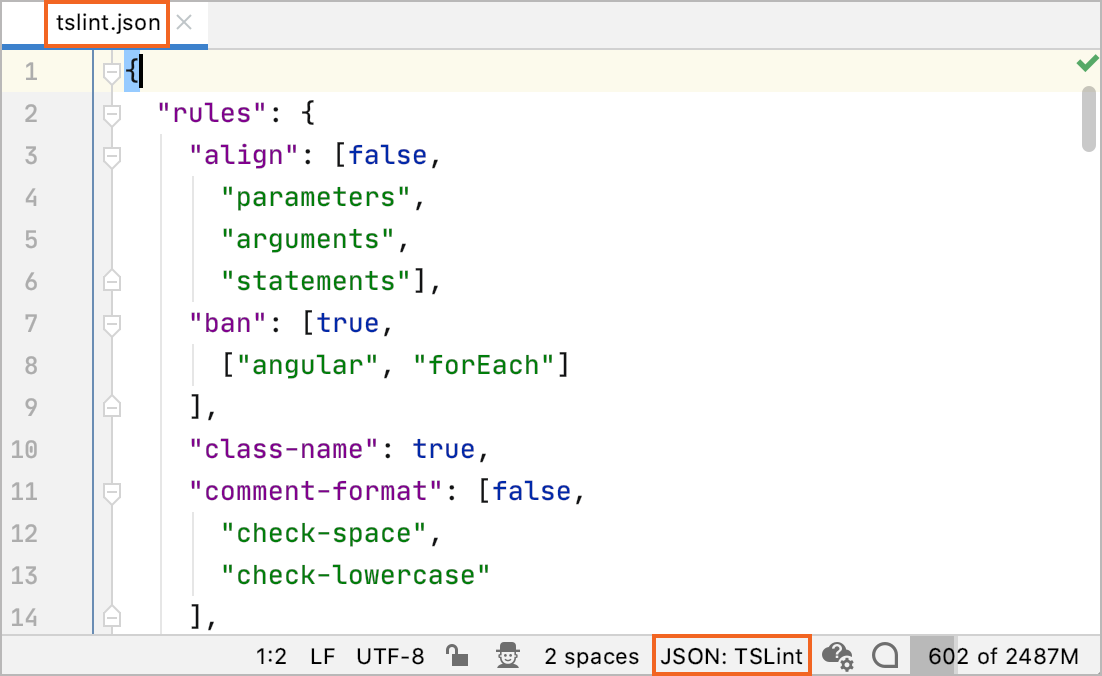

### 10. Working with JSON
**What is JSON?**

JSON stands for JavaScript Object Notation, is an open standard file format that uses human-readable text to store and transmit data objects consisting of key–value pairs. 

**Why JSON?**

It is a common data format with diverse uses in data interchange.
JSON is a **language-independent** data format. It was derived from JavaScript, but many modern programming languages include code to generate and parse JSON-format data. JSON filenames use the extension .json.

In [198]:
import json

#list
l1 = [i for i in range(1, 10)]

#open(json file)->write(list into json file)->close
with open('list1.json','w') as f:
    json.dump(l1,f)

#dump l1(list) into f(json file)

In [199]:
# dictionary
d1 = {
    'course_name':'Data Science',
     'year':2023,
     'state':'Gujarat',
     'city' : 'Ahmedabad'
}

with open('dict1.json','w') as f:
    json.dump(d1,f)
    

In [200]:
# dictionary
d1 = {
    'course_name':'Data Science',
     'year':2023,
     'state':'Gujarat',
     'city' : 'Ahmedabad'
}

with open('dict1.json','w') as f:
    json.dump(d1,f,indent=4)
    
#indentation->for proper formating of dictionary.

### 11. Deserialization
It is the process of converting JSON backto python data types

In [201]:
# deserialization
import json

with open('dict1.json','r') as f:
    val = json.load(f)
    print(d1, type(d1))

#so, using json, we are able to write a dictionary data-type into file & read it back in dictionary data-type. 
# Here, we don't need to convert any data-type into string first.
# We can directly dump the data using json & retain back that data-type.

{'course_name': 'Data Science', 'year': 2023, 'state': 'Gujarat', 'city': 'Ahmedabad'} <class 'dict'>


#### working with tuples

In [202]:
# serialize tuple
import json

t1 = (45, 23, 565, 343, 132, 454)

with open('tuple1.json','w') as f:
    json.dump(t1,f)
    
# we can see, this tuple is stored as a list.

In [203]:
# deserialize tuple

with open('tuple1.json', 'r') as f:
    val = json.load(f)
    print(val, type(val))

# but, we are not able to retain tuple back, instead we got list. 

[45, 23, 565, 343, 132, 454] <class 'list'>


In [204]:
# deserialize tuple

with open('tuple1.json', 'r') as f:
    val = tuple(json.load(f))
    print(val, type(val))

#But, as we know that we can convert list into tuple type & use it.

(45, 23, 565, 343, 132, 454) <class 'tuple'>


#### working with nested dictionary

In [205]:
# serialize dict

d2 = {
    'course_name':'Data Science',
     'year':2023,
     'state':'Gujarat',
     'city' : 'Ahmedabad'
}

with open('dict2.json','w') as f:
    json.dump(d2,f)

In [206]:
#deserialize dict

with open('dict2.json', 'r') as f:
    val = json.load(f)
    print(val, type(val))

{'course_name': 'Data Science', 'year': 2023, 'state': 'Gujarat', 'city': 'Ahmedabad'} <class 'dict'>


### 12. Serialization & Deserialization of custom objects

In [207]:
class Student:

  def __init__(self, name, age, gender, course):
    self.name = name
    self.age = age
    self.gender = gender
    self.course = course


In [208]:
stu1 = Student('Jack', 23, 'male', 'data-science')

In [209]:
# format-> Jack is male of $ 23 years old & doing data-sciecne course.

import json

def details(stu1):
    if isinstance(stu1,Student):
        return "{} is {} of $ {} years old & doing {} course.".format(stu1.name, stu1.gender, stu1.age, stu1.course)

with open('stu1_detail.json','w') as f:
    json.dump(stu1, f, default=details)

#### format->dictionary

In [210]:
# format-> dict
import json

def details(stu1):
    if isinstance(stu1, Student):
        return {'name':stu1.name, 'age':stu1.age, 'gender':stu1.gender, 'course':stu1.course}

with open('stu1_detail.json','w') as f:
    json.dump(stu1,f,default=details,indent=5)

In [211]:
# deserialization
import json

with open('stu1_detail.json','r') as f:
    d1 = json.load(f)
    print(d1, type(d1))

#as we saw, we can retain the data-types during serialization & deserialization. But we can 

{'name': 'Jack', 'age': 23, 'gender': 'male', 'course': 'data-science'} <class 'dict'>


### 13. Pickling

`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [212]:
class Student:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def details(self):
        print('Hi my name is',self.name,'and I am ',self.age,'years old')


In [213]:
stu2 = Student('Jenny',24)

#here, we don't have a create a different function & pass the object there.

In [214]:
#open->write(binary)->close

with open('stu2_detail.pkl','wb') as f:
    pickle.dump(stu2,f)

In [215]:
#open->read(binary)->close
with open('stu2_detail.pkl','rb') as f:
    val = pickle.load(f)
    print(val.details())


Hi my name is Jenny and I am  24 years old
None


### 14. Difference between Pickle & Json

1. Pickle let's the user to store data in binary format. 
2. JSON lets the user store data in a human-readable text format.

**<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< END OF DOCUMENT >>>>>>>>>>>>>>>>>>>>>>>>>>>>>**